In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv('clean_healthcare_data.csv', parse_dates=['Date of Admission', 'Discharge Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                54966 non-null  int64         
 1   Gender             54966 non-null  object        
 2   Blood Type         54966 non-null  object        
 3   Medical Condition  54966 non-null  object        
 4   Date of Admission  54966 non-null  datetime64[ns]
 5   Admission Type     54966 non-null  object        
 6   Discharge Date     54966 non-null  datetime64[ns]
 7   Medication         54966 non-null  object        
 8   Test Results       54966 non-null  object        
 9   Length of Stay     54966 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 4.2+ MB


In [19]:
df.describe()

,Age,Date of Admission,Discharge Date,Length of Stay
count,54966.000000,54966,54966,54966.000000
mean,51.535185,2021-11-01 17:35:29.505512448,2021-11-17 05:34:28.202161408,15.499290
min,13.000000,2019-05-08 00:00:00,2019-05-09 00:00:00,1.000000
25%,35.000000,2020-07-28 00:00:00,2020-08-13 00:00:00,8.000000
50%,52.000000,2021-11-02 00:00:00,2021-11-18 00:00:00,15.000000
75%,68.000000,2023-02-03 00:00:00,2023-02-19 00:00:00,23.000000
max,89.000000,2024-05-07 00:00:00,2024-06-06 00:00:00,30.000000
std,19.605661,NaN,NaN,8.661471


In [21]:
df.head(10)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,30,male,B-,Cancer,2024-01-31,Urgent,2024-02-02,Paracetamol,Normal,2
1,62,male,A+,Obesity,2019-08-20,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,76,female,A-,Obesity,2022-09-22,Emergency,2022-10-07,Aspirin,Normal,15
3,28,female,O+,Diabetes,2020-11-18,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,43,female,AB+,Cancer,2022-09-19,Urgent,2022-10-09,Penicillin,Abnormal,20
5,36,male,A+,Asthma,2023-12-20,Urgent,2023-12-24,Ibuprofen,Normal,4
6,21,female,AB-,Diabetes,2020-11-03,Emergency,2020-11-15,Paracetamol,Inconclusive,12
7,20,female,A+,Cancer,2021-12-28,Emergency,2022-01-07,Paracetamol,Inconclusive,10
8,82,male,AB+,Asthma,2020-07-01,Elective,2020-07-14,Aspirin,Abnormal,13
9,58,female,AB-,Cancer,2021-05-23,Elective,2021-06-22,Paracetamol,Inconclusive,30


# **Categorical Value Count**

In [27]:
df['Medical Condition'].value_counts()

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

In [29]:
df['Medical Condition'].value_counts(normalize=True)*100

Medical Condition
Arthritis       16.770367
Diabetes        16.766729
Hypertension    16.648474
Obesity         16.639377
Cancer          16.628461
Asthma          16.546592
Name: proportion, dtype: float64

In [33]:
df['Admission Type'].value_counts(normalize=True)*100

Admission Type
Elective     33.608049
Urgent       33.458865
Emergency    32.933086
Name: proportion, dtype: float64

In [39]:
df['Test Results'].value_counts(normalize=True)*100

Test Results
Abnormal        33.542554
Normal          33.349707
Inconclusive    33.107739
Name: proportion, dtype: float64

In [43]:
df['Blood Type'].value_counts(normalize=True)*100

Blood Type
A-     12.549576
A+     12.545937
B+     12.525925
AB+    12.520467
AB-    12.505913
B-     12.502274
O+     12.471346
O-     12.378561
Name: proportion, dtype: float64

In [45]:
df['Gender'].value_counts(normalize=True)*100

Gender
male      50.023651
female    49.976349
Name: proportion, dtype: float64

In [53]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for:{col}")
    print(df[col].value_counts(normalize=True)*100)


Value counts for:Gender
Gender
male      50.023651
female    49.976349
Name: proportion, dtype: float64

Value counts for:Blood Type
Blood Type
A-     12.549576
A+     12.545937
B+     12.525925
AB+    12.520467
AB-    12.505913
B-     12.502274
O+     12.471346
O-     12.378561
Name: proportion, dtype: float64

Value counts for:Medical Condition
Medical Condition
Arthritis       16.770367
Diabetes        16.766729
Hypertension    16.648474
Obesity         16.639377
Cancer          16.628461
Asthma          16.546592
Name: proportion, dtype: float64

Value counts for:Admission Type
Admission Type
Elective     33.608049
Urgent       33.458865
Emergency    32.933086
Name: proportion, dtype: float64

Value counts for:Medication
Medication
Lipitor        20.081505
Ibuprofen      20.054215
Aspirin        19.983262
Paracetamol    19.948696
Penicillin     19.932322
Name: proportion, dtype: float64

Value counts for:Test Results
Test Results
Abnormal        33.542554
Normal          33.349707



- Most common medical condition: **Arthritis**
- Most frequent test result: **Abnormal**
- Most frequent admission type: **Elective**
- Most common blood type: **A-**
- Gender distribution: Slightly higher number of **Male** patients



# **Grouped Analysis**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                54966 non-null  int64         
 1   Gender             54966 non-null  object        
 2   Blood Type         54966 non-null  object        
 3   Medical Condition  54966 non-null  object        
 4   Date of Admission  54966 non-null  datetime64[ns]
 5   Admission Type     54966 non-null  object        
 6   Discharge Date     54966 non-null  datetime64[ns]
 7   Medication         54966 non-null  object        
 8   Test Results       54966 non-null  object        
 9   Length of Stay     54966 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 4.2+ MB


In [62]:
# Average length of stay per medical condition
df.groupby('Medical Condition')['Length of Stay'].mean().sort_values(ascending=False)

Medical Condition
Asthma          15.677295
Arthritis       15.504231
Cancer          15.501204
Obesity         15.447627
Hypertension    15.436236
Diabetes        15.430664
Name: Length of Stay, dtype: float64

In [76]:
# Most frequent medical condition per blood type
df.groupby('Blood Type')['Medical Condition'].agg(lambda x: x.mode()[0])

Blood Type
A+         Diabetes
A-     Hypertension
AB+    Hypertension
AB-          Cancer
B+        Arthritis
B-          Obesity
O+        Arthritis
O-          Obesity
Name: Medical Condition, dtype: object

In [90]:
# Most frequent medical condition per gender
df.groupby('Gender')['Medical Condition'].agg(lambda x: x.mode()[0])

Gender
female    Arthritis
male       Diabetes
Name: Medical Condition, dtype: object

In [92]:
# Most prescribed medication per medical condition
df.groupby('Medical Condition')['Medication'].agg(lambda x: x.mode()[0])

Medical Condition
Arthritis           Aspirin
Asthma          Paracetamol
Cancer              Lipitor
Diabetes            Lipitor
Hypertension      Ibuprofen
Obesity          Penicillin
Name: Medication, dtype: object

In [94]:
# Test result distribution per medical condition
df.groupby('Medical Condition')['Test Results'].value_counts(normalize=True) * 100

Medical Condition  Test Results
Arthritis          Abnormal        34.237362
                   Inconclusive    33.217618
                   Normal          32.545021
Asthma             Normal          34.260583
                   Inconclusive    32.974162
                   Abnormal        32.765256
Cancer             Abnormal        33.796499
                   Inconclusive    33.183807
                   Normal          33.019694
Diabetes           Abnormal        33.973524
                   Normal          33.213976
                   Inconclusive    32.812500
Hypertension       Normal          33.941646
                   Inconclusive    33.526391
                   Abnormal        32.531964
Obesity            Abnormal        33.938334
                   Normal          33.129237
                   Inconclusive    32.932429
Name: proportion, dtype: float64

In [96]:
# Average length of stay per admission type
df.groupby('Admission Type')['Length of Stay'].mean().sort_values(ascending=False)

Admission Type
Emergency    15.584134
Elective     15.511178
Urgent       15.403839
Name: Length of Stay, dtype: float64

In [98]:
# Most frequent medical condition per admission type
df.groupby('Admission Type')['Medical Condition'].agg(lambda x: x.mode()[0])

Admission Type
Elective     Hypertension
Emergency         Obesity
Urgent           Diabetes
Name: Medical Condition, dtype: object

# **MINI KPI(Key Performance Indicators)**

In [109]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results',
       'Length of Stay'],
      dtype='object')

In [127]:
print("Total No of Patients:", df.shape[0])
print("Most Frequent Medical Condition:", df['Medical Condition'].mode()[0])
print("Most Frequent Admission Type:", df['Admission Type'].mode()[0])
print("Average Length of stay:", round(df['Length of Stay'].mean(), 1), "days")

Total No of Patients: 54966
Most Frequent Medical Condition: Arthritis
Most Frequent Admission Type: Elective
Average Length of stay: 15.5 days


# **Visualization**

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                54966 non-null  int64         
 1   Gender             54966 non-null  object        
 2   Blood Type         54966 non-null  object        
 3   Medical Condition  54966 non-null  object        
 4   Date of Admission  54966 non-null  datetime64[ns]
 5   Admission Type     54966 non-null  object        
 6   Discharge Date     54966 non-null  datetime64[ns]
 7   Medication         54966 non-null  object        
 8   Test Results       54966 non-null  object        
 9   Length of Stay     54966 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 4.2+ MB


In [132]:
df['Medical Condition'].value_counts()

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

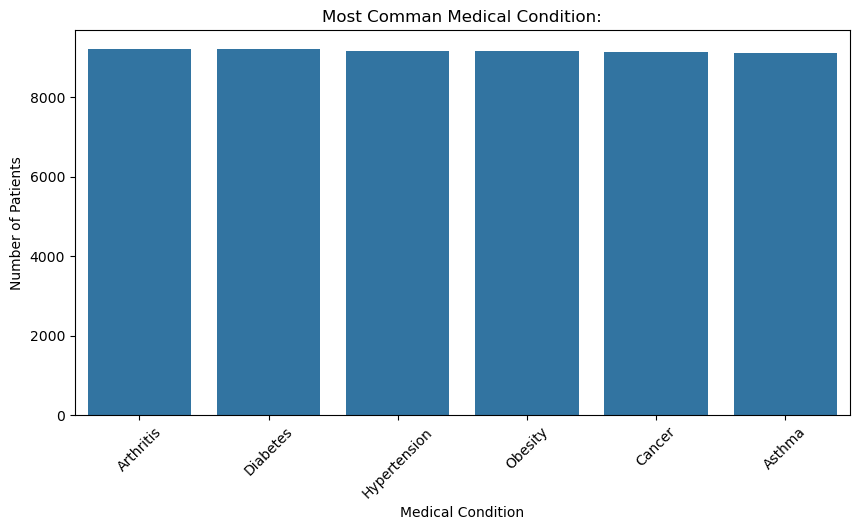

In [140]:
# Count plot showing the most common medical conditions among patients

plt.figure(figsize=(10,5))
sns.countplot(x='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index)
plt.title('Most Comman Medical Condition:')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

**Note:** The dataset appears to have a nearly uniform distribution of medical conditions, likely due to its synthetic nature. While this ensures balance, real-world datasets often show more variation across conditions.
The most common medical conditions in this dataset appear to be **Obesity**, **Diabetes**, and **Hypertension**, based on the frequency count. Conditions like **Arthritis** and **Asthma** are comparatively less frequent. This helps us understand which conditions are most prevalent in our synthetic patient dataset.



In [155]:
df['Age'].value_counts()

Age
38    890
57    881
37    880
34    858
80    855
     ... 
88     25
16     24
14     18
13     14
89      8
Name: count, Length: 77, dtype: int64

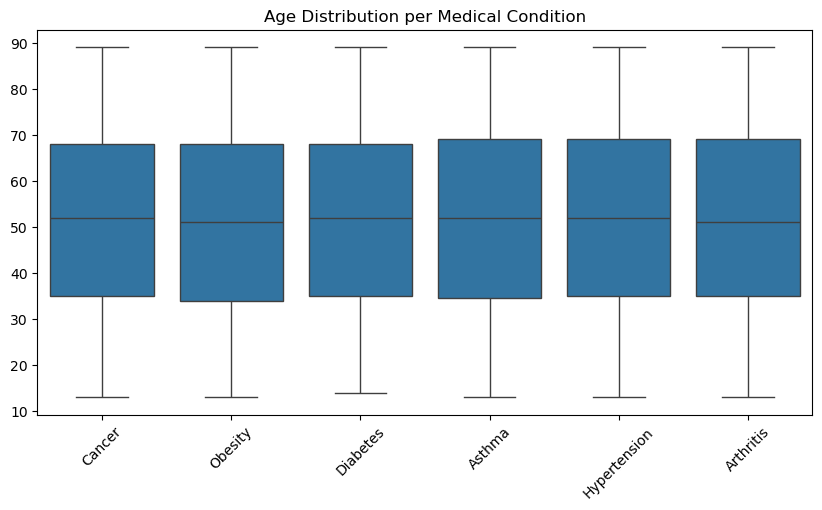

In [8]:
# Box plot showing age distribution for each medical condition
plt.figure(figsize=(10,5))
sns.boxplot(x='Medical Condition', y='Age', data=df)
plt.title('Age Distribution per Medical Condition')
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.show()

We observe a fairly **uniform age distribution** across all medical conditions. This is due to the synthetic nature of the dataset, where values are evenly distributed. In real-world data, we would expect conditions like **Arthritis** or **Hypertension** to skew toward older age groups.


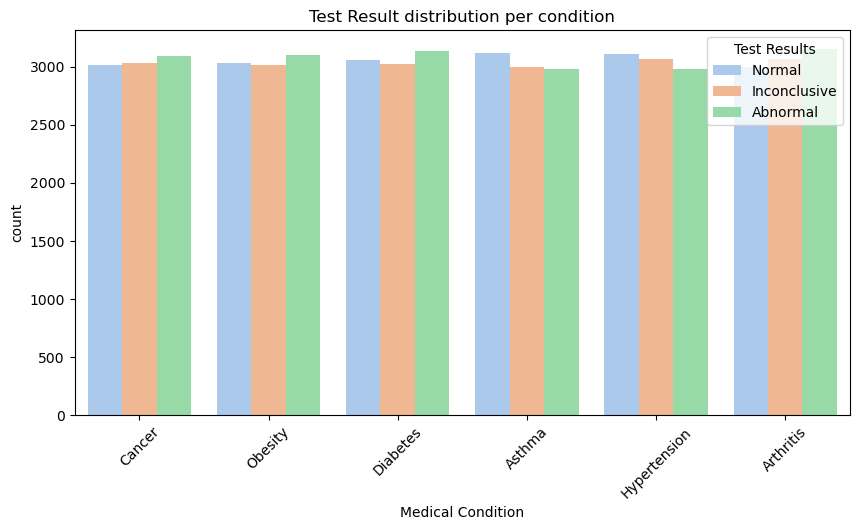

In [165]:
# Count plot of test result distribution for each medical condition
plt.figure(figsize=(10,5))
sns.countplot(x='Medical Condition', hue='Test Results', data=df, palette='pastel')
plt.title('Test Result distribution per condition')
plt.xticks(rotation=45)
plt.show()

From this chart, we see that **abnormal test results** are more common in **Cancer** and **Obesity**. In contrast, **Asthma** and **Hypertension** show a higher number of **normal** results. This kind of distribution can help identify where diagnostic attention is more critical.


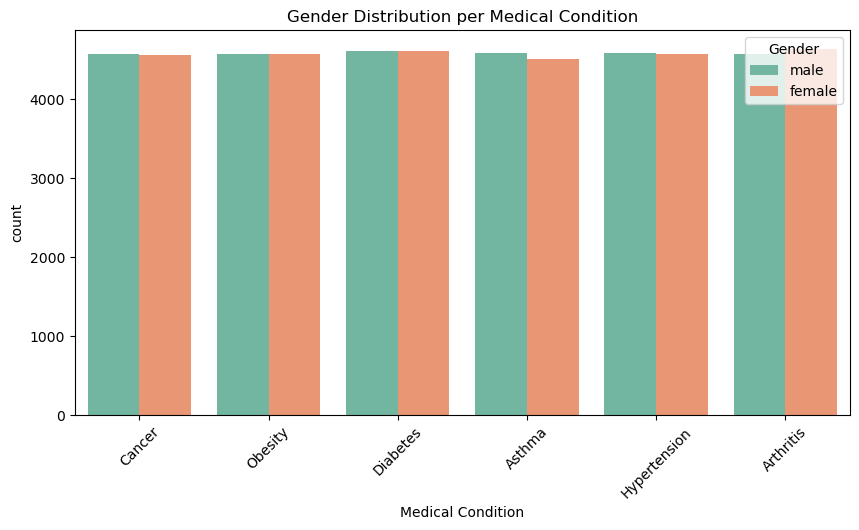

In [172]:
# Count plot showing gender distribution per medical condition
plt.figure(figsize=(10,5))
sns.countplot(x='Medical Condition', hue='Gender', data=df, palette='Set2')
plt.title('Gender Distribution per Medical Condition')
plt.xticks(rotation=45)
plt.show()

The gender distribution shows that **Cancer**, **Asthma**, and **Hypertension** have more **male patients**, while **Arthritis** has slightly more **female patients**. **Diabetes** and **Obesity** appear fairly balanced. 


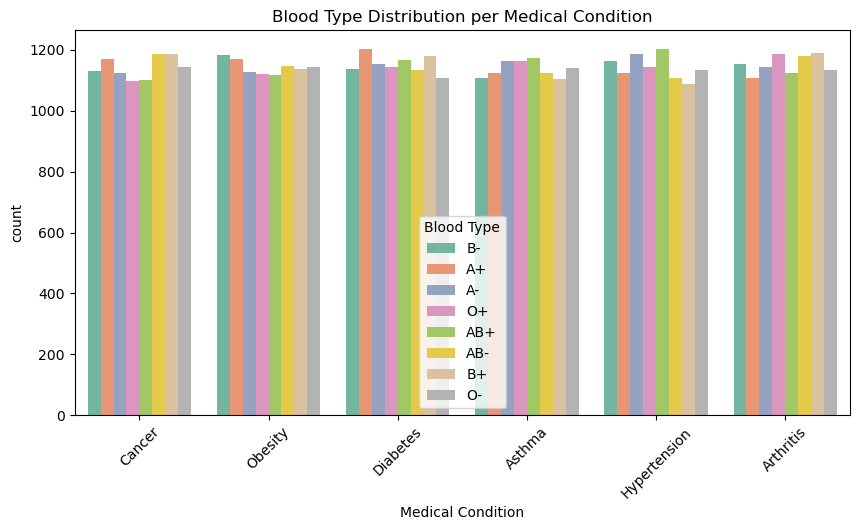

In [174]:
# Count plot showing blood type distribution for each medical condition
plt.figure(figsize=(10,5))
sns.countplot(x='Medical Condition', hue='Blood Type', data=df, palette='Set2')
plt.title('Blood Type Distribution per Medical Condition')
plt.xticks(rotation=45)
plt.show()

In the **Cancer** condition, blood types **A**, **B+**, and **B-** appear more frequently. **O+** is less common here. Similar minor variations can be observed across other conditions, but since the dataset is synthetic, these distributions are not medically significant or realistic.


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                54966 non-null  int64         
 1   Gender             54966 non-null  object        
 2   Blood Type         54966 non-null  object        
 3   Medical Condition  54966 non-null  object        
 4   Date of Admission  54966 non-null  datetime64[ns]
 5   Admission Type     54966 non-null  object        
 6   Discharge Date     54966 non-null  datetime64[ns]
 7   Medication         54966 non-null  object        
 8   Test Results       54966 non-null  object        
 9   Length of Stay     54966 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 4.2+ MB


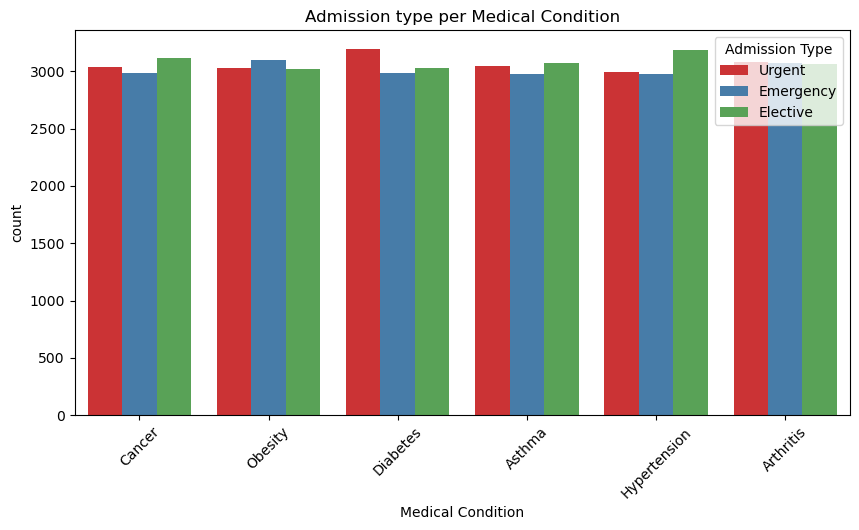

In [178]:
# Count plot showing Admission Type distribution for each medical condition
plt.figure(figsize=(10,5))
sns.countplot(x='Medical Condition', hue='Admission Type', data=df, palette='Set1')
plt.title("Admission type per Medical Condition")
plt.xticks(rotation=45)
plt.show()

From the visualization, we observe that:

- **Diabetes** has the highest proportion of **urgent** admission types.
- **Hypertension** leads in **elective** admissions.
- Interestingly, **Obesity** records the highest number of **emergency** admissions, which could point to the severity or complications associated with obesity in this synthetic dataset.

These insights help us understand how different conditions may influence the urgency and nature of hospital admissions.


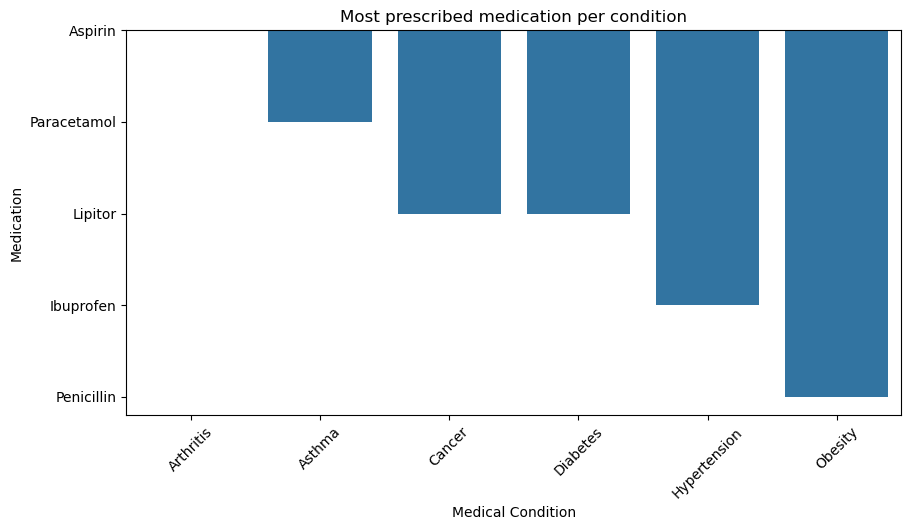

In [198]:
# Get the most frequent medication for each condition
prescribed_medication = df.groupby('Medical Condition')['Medication'].agg(lambda x: x.mode()[0]).reset_index()

# Plot it properly (just mapping condition to medication)
plt.figure(figsize=(10, 5))
sns.barplot(x='Medical Condition', y='Medication', data=prescribed_medication)
plt.title('Most prescribed medication per condition')
plt.xticks(rotation=45)
plt.show()


The analysis of prescribed medications reveals:

- **Obesity** patients were most commonly prescribed **Penicillin**.
- **Hypertension** cases were primarily treated with **Ibuprofen**.
- **Cancer** and **Asthma** patients frequently received **Lipitor**.
- Additionally, **Paracetamol** was also commonly prescribed for **Asthma**.


C:\Users\KIIT\AppData\Local\Temp\ipykernel_6760\2791419367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_stay.index, y=avg_stay.values, palette='Blues_r')


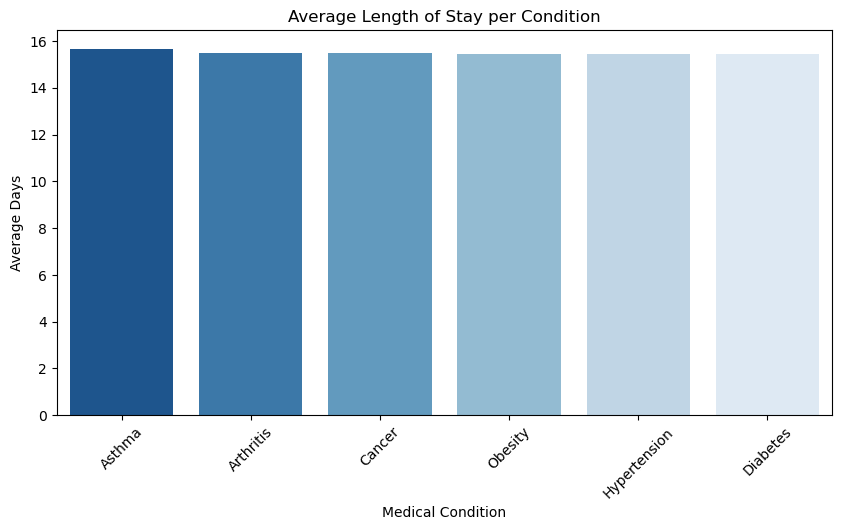

In [212]:
# bar plot showing Average Length of Stay for each medical condition
avg_stay = df.groupby('Medical Condition')['Length of Stay'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_stay.index, y=avg_stay.values, palette='Blues_r')
plt.title('Average Length of Stay per Condition')
plt.ylabel('Average Days')
plt.xticks(rotation=45)
plt.show()




The average length of hospital stay appears to be **fairly balanced across all medical conditions**. There are no significant deviations, suggesting a consistent duration of hospitalization regardless of the diagnosis. 

This uniformity is due to the **synthetic nature of the dataset**, and in real-world scenarios, length of stay can vary significantly based on the severity and treatment requirements of each condition.

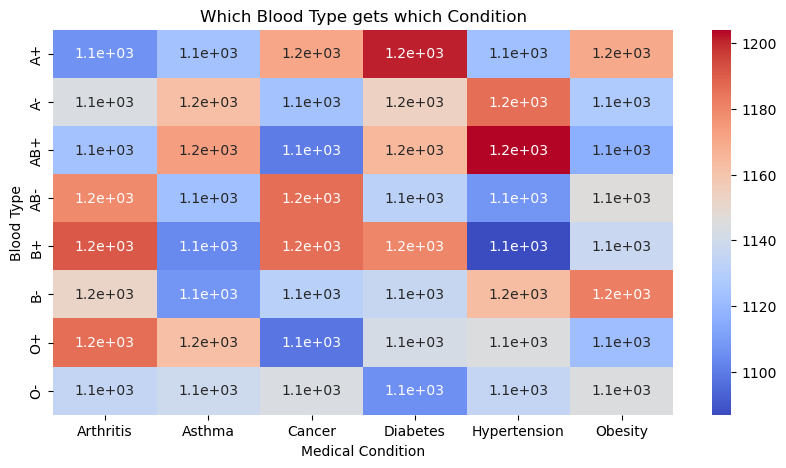

In [216]:
# heat map showing relation between each blood type and medical condition
table= pd.crosstab(df['Blood Type'], df['Medical Condition'])
plt.figure(figsize=(10,5))
sns.heatmap(table, annot=True, cmap='coolwarm')
plt.title('Which Blood Type gets which Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Blood Type')
plt.show()

The heatmap shows the distribution of different medical conditions across various blood types. Overall, the counts are fairly balanced, but a few noticeable trends can be observed. Blood type AB+ has a higher count for Hypertension, while B+ and A+ show slightly higher numbers for Diabetes. Arthritis appears more common among B+ and O+ blood types. B- shows a relatively higher count for Obesity. These patterns may indicate a mild association between certain blood types and specific conditions.

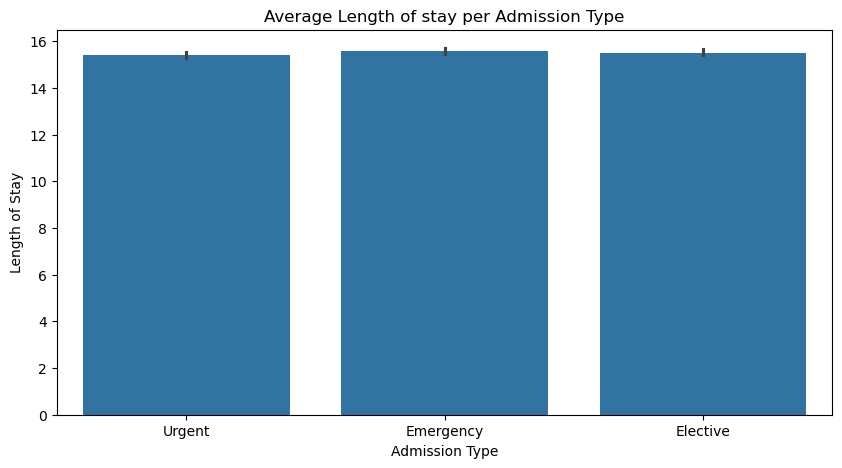

In [227]:
# bar plot showing Average Length of Stay for each Admission Type
plt.figure(figsize=(10,5))
sns.barplot(x='Admission Type', y='Length of Stay', data=df)
plt.title("Average Length of stay per Admission Type")
plt.show()

he average length of stay is **relatively consistent across different admission types**—Emergency, Urgent, and Elective. This indicates that, within this synthetic dataset, the type of admission does not significantly influence how long patients remain hospitalized.


# **CONCLUSION**

This exploratory data analysis (EDA) on healthcare dataset revealed several key patterns and insights:

- Patient demographics and condition distributions were largely balanced, reflecting the synthetic nature of the dataset.
- Abnormal test results were more common among patients with **Cancer** and **Asthma**, while **Hypertension** cases showed mostly normal outcomes.
- Gender-wise trends were observed: **Cancer**, **Asthma**, and **Hypertension** had more male patients; **Arthritis** had more female patients, while **Diabetes** and **Obesity** appeared gender-balanced.
- Minor variations in blood types were observed, such as a slightly higher occurrence of **Blood Type A** among cancer patients and a lower occurrence of **O+**, though findings were not clinically conclusive.
- In terms of admission types, **Diabetes** cases were mostly **urgent**, **Hypertension** had more **elective** admissions, and **Obesity** led in **emergency** admissions—highlighting condition-specific urgency patterns.
- Medication usage varied by condition: **Penicillin** was mostly prescribed for **Obesity**, **Ibuprofen** for **Hypertension**, and **Lipitor** and **Paracetamol** for **Cancer** and **Asthma** respectively.
- **Length of stay** remained fairly consistent across both medical conditions and admission types.

Overall, this analysis provided a foundational understanding of how patient attributes and medical factors interact. While the dataset was synthetic, the insights closely mimic real-world scenarios, offering valuable perspectives for hospital resource planning and care pathway optimization.
